In [ ]:
#import necessary libraries and modules
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.applications import vgg16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#load VGG16
#excluding top layers of VGG16
vgg_model = vgg16.VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3),
    classes = 4
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#freeze convolution layers of VGG16
model = tf.keras.models.Sequential()
for layer in vgg_model.layers:
  layer.trainable = False
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#adding custom top layers to VGG16
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(4, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
#load and prepare the dataset
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Dataset_Processed/Training", target_size=(224,224))
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Dataset_Processed/Validation", target_size=(224,224))

In [ ]:
#train the model
model.fit(train_dataset, validation_data=validation_dataset, steps_per_epoch=154, epochs=10)

Epoch 1/10
154/154 [==============================] - 1599s 10s/step - loss: 0.8913 - accuracy: 0.7569 - val_loss: 0.3724 - val_accuracy: 0.8584
Epoch 2/10
154/154 [==============================] - 23s 151ms/step - loss: 0.3703 - accuracy: 0.8614 - val_loss: 0.3174 - val_accuracy: 0.8793
Epoch 3/10
154/154 [==============================] - 25s 159ms/step - loss: 0.3133 - accuracy: 0.8794 - val_loss: 0.2593 - val_accuracy: 0.9021
Epoch 4/10
154/154 [==============================] - 25s 161ms/step - loss: 0.2621 - accuracy: 0.9040 - val_loss: 0.2480 - val_accuracy: 0.9087
Epoch 5/10
154/154 [==============================] - 25s 163ms/step - loss: 0.2427 - accuracy: 0.9063 - val_loss: 0.2346 - val_accuracy: 0.9068
Epoch 6/10
154/154 [==============================] - 24s 157ms/step - loss: 0.2242 - accuracy: 0.9130 - val_loss: 0.2336 - val_accuracy: 0.9106
Epoch 7/10
154/154 [==============================] - 24s 155ms/step - loss: 0.2167 - accuracy: 0.9134 - val_loss: 0.2155 - val_ac

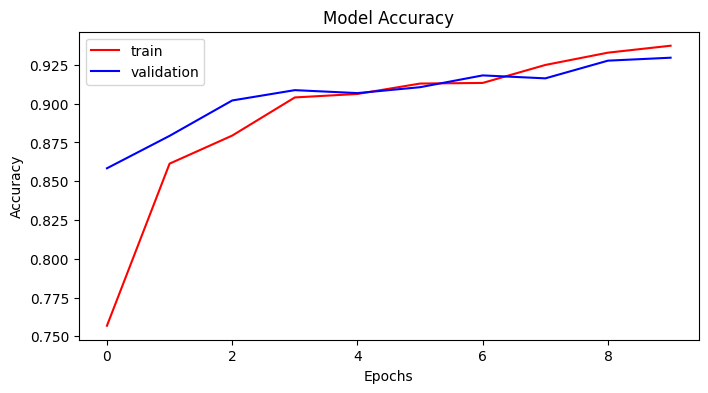

In [ ]:
#accuracy plot
plt.figure(figsize=(8,4))
plt.plot(model.history.history['accuracy'], color='r')
plt.plot(model.history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

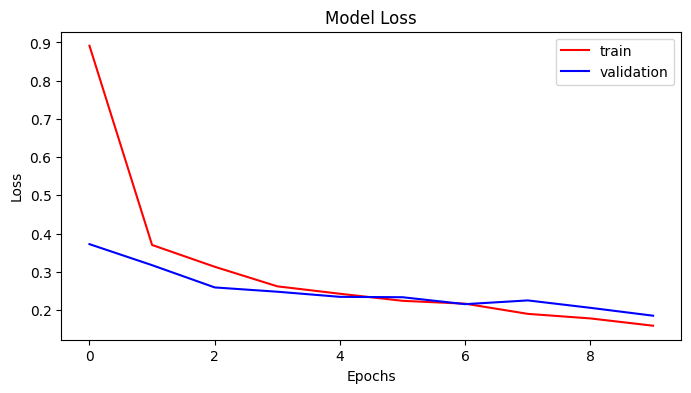

In [ ]:
#loss plot
plt.figure(figsize=(8,4))
plt.plot(model.history.history['loss'], color='r')
plt.plot(model.history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#save the model
model.save('/content/drive/MyDrive/brain_tumor_classification_models2.h5')

In [ ]:
#load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/brain_tumor_classification_models2.h5')

In [ ]:
#load test dataset
datagen = ImageDataGenerator(rescale=1/255)
test_generator = datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset_Processed/Testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1052 images belonging to 4 classes.


In [ ]:
#evaluate the model on test set
true_labels = test_generator.classes
predictions = loaded_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

33/33 [==============================] - 242s 8s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.17      0.18       243
           1       0.28      0.30      0.29       246
           2       0.27      0.27      0.27       300
           3       0.29      0.30      0.29       263

    accuracy                           0.26      1052
   macro avg       0.26      0.26      0.26      1052
weighted avg       0.26      0.26      0.26      1052

Confusion Matrix:
[[41 58 87 57]
 [55 74 64 53]
 [58 74 82 86]
 [59 57 68 79]]
33/33 [==============================] - 4s 123ms/step - loss: 0.1699 - accuracy: 0.9363
Test Loss: 0.1699494570493698
Test Accuracy: 0.9363117814064026
